In [1]:
from main_functions import *
from torch.utils.data import TensorDataset, DataLoader
import time

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
data = np.load('mnist.npz')
X_train = data['X_train']
Y_train = data['Y_train']
X_test = data['X_test']
Y_test = data['Y_test']

In [4]:
batch_size = 64
single_layer = [784,128,10]
several_layers = [784,128,64,64,10]
np.random.seed(42)
torch.manual_seed(42) 

In [5]:
# convert data to tensor
X_train_t = torch.Tensor(X_train)
Y_train_t = torch.Tensor(Y_train)
X_test_t= torch.Tensor(X_test)
Y_test_t= torch.Tensor(Y_test)

In [6]:
# Create TensorDataset objects for training and testing data
train_data = TensorDataset(X_train_t, Y_train_t)
test_data = TensorDataset(X_test_t, Y_test_t)

# Create DataLoader objects for training and testing data
train_loader = DataLoader (dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

#### Neural Networks

##### With one hidden layer

In [7]:
first_nn_model = NeuralNet(single_layer).to(device)
start = time.time()
first_nn_train_losses, first_nn_train_accuracies,first_nn_test_losses, first_nn_test_accuracies = train_model(
    first_nn_model, train_loader, test_loader, 200, 0.01, device, isCNN=False, optimizer_type='SGD', use_scheduler=False)
end = time.time()

For Epoch [1/200], the Loss is: 2.0909
For Epoch [1/200], the Loss is: 1.8123
For Epoch [1/200], the Loss is: 1.4605
For Epoch [1/200], the Loss is: 1.2152
For Epoch [1/200], the Loss is: 0.9857
For Epoch [1/200], the Loss is: 0.8095
For Epoch [1/200], the Loss is: 0.8568
For Epoch [1/200], the Loss is: 0.8890
For Epoch [1/200], the Loss is: 0.6678
The accuracy of this network on the test set is: 86.48 %
For Epoch [2/200], the Loss is: 0.4772
For Epoch [2/200], the Loss is: 0.6599
For Epoch [2/200], the Loss is: 0.6295
For Epoch [2/200], the Loss is: 0.4277
For Epoch [2/200], the Loss is: 0.6516
For Epoch [2/200], the Loss is: 0.6018
For Epoch [2/200], the Loss is: 0.4475
For Epoch [2/200], the Loss is: 0.3668
For Epoch [2/200], the Loss is: 0.4356
The accuracy of this network on the test set is: 89.4 %
For Epoch [3/200], the Loss is: 0.4323
For Epoch [3/200], the Loss is: 0.3625
For Epoch [3/200], the Loss is: 0.5120
For Epoch [3/200], the Loss is: 0.4608
For Epoch [3/200], the Loss i

In [8]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 423.9463400840759


In [9]:
test_model(first_nn_model, test_loader, device, isCNN = False, isBestModel = False)

The accuracy of this network on the test set is: 97.89 %


(0.07103815128593735, 97.89)

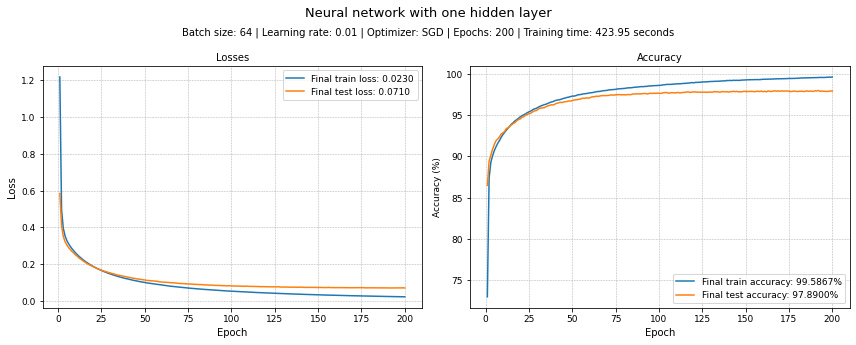

In [10]:
subtitle = f"Batch size: 64 | Learning rate: 0.01 | Optimizer: SGD | Epochs: 200 | Training time: {end - start:.2f} seconds"
training_curve_plot("Neural network with one hidden layer", subtitle, first_nn_train_losses, first_nn_test_losses, first_nn_train_accuracies, first_nn_test_accuracies)

##### With three hidden layers

In [11]:
second_nn_model = NeuralNet(several_layers).to(device)
start = time.time()
second_nn_train_losses, second_nn_train_accuracies,second_nn_test_losses, second_nn_test_accuracies =train_model(second_nn_model, train_loader,test_loader, 150 ,0.01, device, isCNN = False, optimizer_type = 'SGD', use_scheduler = False)
end = time.time()

For Epoch [1/150], the Loss is: 2.3005
For Epoch [1/150], the Loss is: 2.2991
For Epoch [1/150], the Loss is: 2.2910
For Epoch [1/150], the Loss is: 2.2950
For Epoch [1/150], the Loss is: 2.2719
For Epoch [1/150], the Loss is: 2.2881
For Epoch [1/150], the Loss is: 2.2625
For Epoch [1/150], the Loss is: 2.2501
For Epoch [1/150], the Loss is: 2.2179
The accuracy of this network on the test set is: 45.379999999999995 %
For Epoch [2/150], the Loss is: 2.1629
For Epoch [2/150], the Loss is: 2.0607
For Epoch [2/150], the Loss is: 1.9385
For Epoch [2/150], the Loss is: 1.7098
For Epoch [2/150], the Loss is: 1.2703
For Epoch [2/150], the Loss is: 1.2028
For Epoch [2/150], the Loss is: 0.9794
For Epoch [2/150], the Loss is: 0.7769
For Epoch [2/150], the Loss is: 0.7625
The accuracy of this network on the test set is: 77.02 %
For Epoch [3/150], the Loss is: 0.5493
For Epoch [3/150], the Loss is: 0.5250
For Epoch [3/150], the Loss is: 0.5095
For Epoch [3/150], the Loss is: 0.4749
For Epoch [3/15

In [12]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 429.35025906562805


In [13]:
test_model(second_nn_model, test_loader, device, isCNN = False, isBestModel = False)

The accuracy of this network on the test set is: 97.56 %


(0.10997121774437274, 97.56)

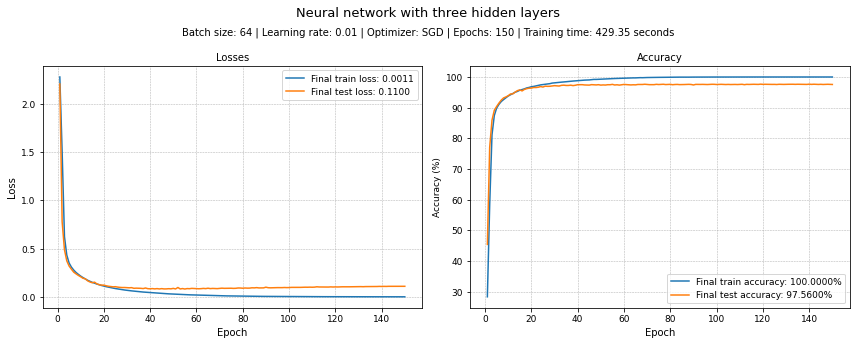

In [14]:
subtitle = f"Batch size: 64 | Learning rate: 0.01 | Optimizer: SGD | Epochs: 150 | Training time: {end - start:.2f} seconds"
training_curve_plot("Neural network with three hidden layers", subtitle, second_nn_train_losses, second_nn_test_losses, second_nn_train_accuracies, second_nn_test_accuracies)

#### CNN

In [15]:
# CNN models structures
CNN1 = [
    {'type': 'Conv2d', 'structure': {'in_channels': 1, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},

    {'type': 'Conv2d', 'structure': {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},

    {'type': 'Conv2d', 'structure': {'in_channels': 16, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},

    {'type': 'Flatten', 'structure': {}},
    {'type': 'Linear', 'structure': {'in_features': 32 * 7 * 7, 'out_features': 10}}
]

CNN_swapped = [
    {'type': 'Conv2d', 'structure': {'in_channels': 1, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},
    {'type': 'ReLU', 'structure': {}},

    {'type': 'Conv2d', 'structure': {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},
    {'type': 'ReLU', 'structure': {}},

    {'type': 'Conv2d', 'structure': {'in_channels': 16, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},

    {'type': 'Flatten', 'structure': {}},
    {'type': 'Linear', 'structure': {'in_features': 32 * 7 * 7, 'out_features': 10}}
]

CNN_tanh = [
    {'type': 'Conv2d', 'structure': {'in_channels': 1, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},
    {'type': 'Tanh', 'structure': {}},

    {'type': 'Conv2d', 'structure': {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},
    {'type': 'Tanh', 'structure': {}},

    {'type': 'Conv2d', 'structure': {'in_channels': 16, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'Tanh', 'structure': {}},

    {'type': 'Flatten', 'structure': {}},
    {'type': 'Linear', 'structure': {'in_features': 32 * 7 * 7, 'out_features': 10}}
]

CNN_dropout = [ #dropout
    {'type': 'Conv2d', 'structure': {'in_channels': 1, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},

    {'type': 'Conv2d', 'structure': {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},

    {'type': 'Conv2d', 'structure': {'in_channels': 16, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ReLU', 'structure': {}},

    {'type': 'Flatten', 'structure': {}},
    {'type': 'Dropout', 'structure': {'p': 0.1}},  # Dropout probability
    {'type': 'Linear', 'structure': {'in_features': 32 * 7 * 7, 'out_features': 10}}
]

CNN_elu = [
    {'type': 'Conv2d', 'structure': {'in_channels': 1, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ELU', 'structure': {}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},

    {'type': 'Conv2d', 'structure': {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ELU', 'structure': {}},
    {'type': 'MaxPool2d', 'structure': {'kernel_size': 2, 'stride': 2}},

    {'type': 'Conv2d', 'structure': {'in_channels': 16, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 1}},
    {'type': 'ELU', 'structure': {}},

    {'type': 'Flatten', 'structure': {}},
    {'type': 'Linear', 'structure': {'in_features': 32 * 7 * 7, 'out_features': 10}}
]

##### First CNN Model

In [16]:
first_cnn_model = ConvNet(CNN1).to(device)

In [17]:
start = time.time()
first_cnn_train_losses, first_cnn_train_accuracies,first_cnn_test_losses, first_cnn_test_accuracies = train_model(first_cnn_model, train_loader,test_loader, 50 ,0.01, device, isCNN = True, optimizer_type = 'SGD', use_scheduler = False)
end = time.time()

For Epoch [1/50], the Loss is: 2.2753
For Epoch [1/50], the Loss is: 2.0957
For Epoch [1/50], the Loss is: 0.9679
For Epoch [1/50], the Loss is: 0.6076
For Epoch [1/50], the Loss is: 0.4541
For Epoch [1/50], the Loss is: 0.9267
For Epoch [1/50], the Loss is: 0.4205
For Epoch [1/50], the Loss is: 0.5020
For Epoch [1/50], the Loss is: 0.3366
The accuracy of this network on the test set is: 89.97 %
For Epoch [2/50], the Loss is: 0.2055
For Epoch [2/50], the Loss is: 0.3679
For Epoch [2/50], the Loss is: 0.2404
For Epoch [2/50], the Loss is: 0.2726
For Epoch [2/50], the Loss is: 0.2534
For Epoch [2/50], the Loss is: 0.2996
For Epoch [2/50], the Loss is: 0.2451
For Epoch [2/50], the Loss is: 0.1579
For Epoch [2/50], the Loss is: 0.3163
The accuracy of this network on the test set is: 93.78999999999999 %
For Epoch [3/50], the Loss is: 0.1323
For Epoch [3/50], the Loss is: 0.2738
For Epoch [3/50], the Loss is: 0.1872
For Epoch [3/50], the Loss is: 0.1400
For Epoch [3/50], the Loss is: 0.2105


In [18]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 609.6079189777374


In [19]:
test_model(first_cnn_model, test_loader, device, isCNN = True, isBestModel = False)

The accuracy of this network on the test set is: 98.99 %


(0.03453209528995746, 98.99)

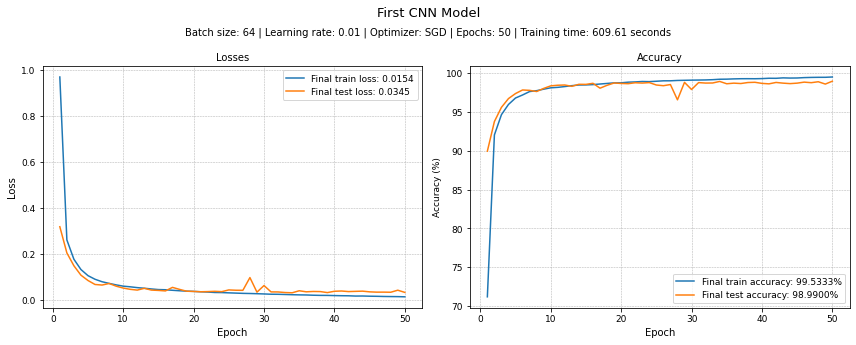

In [20]:
subtitle = f"Batch size: 64 | Learning rate: 0.01 | Optimizer: SGD | Epochs: 50 | Training time: {end - start:.2f} seconds"
training_curve_plot("First CNN Model", subtitle, first_cnn_train_losses, first_cnn_test_losses, first_cnn_train_accuracies, first_cnn_test_accuracies)

##### Order of Relu and Pooling swapped

In [21]:
second_cnn_model = ConvNet(CNN_swapped).to(device)

In [22]:
start = time.time()
second_cnn_train_losses, second_cnn_train_accuracies,second_cnn_test_losses, second_cnn_test_accuracies = train_model(second_cnn_model, train_loader,test_loader, 50 ,0.01, device, isCNN = True, optimizer_type = 'SGD', use_scheduler = False)
end = time.time()

For Epoch [1/50], the Loss is: 2.2982
For Epoch [1/50], the Loss is: 2.2981
For Epoch [1/50], the Loss is: 2.2931
For Epoch [1/50], the Loss is: 2.2778
For Epoch [1/50], the Loss is: 2.2652
For Epoch [1/50], the Loss is: 2.2209
For Epoch [1/50], the Loss is: 1.9730
For Epoch [1/50], the Loss is: 0.8039
For Epoch [1/50], the Loss is: 0.5827
The accuracy of this network on the test set is: 84.06 %
For Epoch [2/50], the Loss is: 0.3567
For Epoch [2/50], the Loss is: 0.4034
For Epoch [2/50], the Loss is: 0.5187
For Epoch [2/50], the Loss is: 0.3391
For Epoch [2/50], the Loss is: 0.2795
For Epoch [2/50], the Loss is: 0.3281
For Epoch [2/50], the Loss is: 0.3097
For Epoch [2/50], the Loss is: 0.5200
For Epoch [2/50], the Loss is: 0.1524
The accuracy of this network on the test set is: 92.0 %
For Epoch [3/50], the Loss is: 0.2951
For Epoch [3/50], the Loss is: 0.1878
For Epoch [3/50], the Loss is: 0.2301
For Epoch [3/50], the Loss is: 0.2074
For Epoch [3/50], the Loss is: 0.2269
For Epoch [3/

In [23]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 374.0270221233368


In [24]:
test_model(second_cnn_model, test_loader, device, isCNN = True, isBestModel=False)

The accuracy of this network on the test set is: 98.8 %


(0.03764029480137819, 98.8)

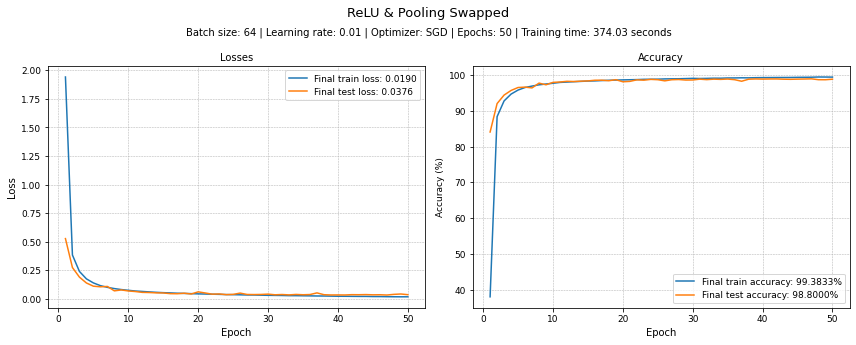

In [25]:
subtitle = f"Batch size: 64 | Learning rate: 0.01 | Optimizer: SGD | Epochs: 50 | Training time: {end - start:.2f} seconds"
training_curve_plot("ReLU & Pooling Swapped", subtitle, second_cnn_train_losses, second_cnn_test_losses, second_cnn_train_accuracies, second_cnn_test_accuracies)

##### Using tanh

In [26]:
third_cnn_model = ConvNet(CNN_tanh).to(device)

In [27]:
start = time.time()
third_cnn_train_losses, third_cnn_train_accuracies,third_cnn_test_losses, third_cnn_test_accuracies = train_model(third_cnn_model, train_loader,test_loader, 50 ,0.01, device, isCNN = True, optimizer_type = 'SGD', use_scheduler = False)
end = time.time()

For Epoch [1/50], the Loss is: 2.2579
For Epoch [1/50], the Loss is: 2.1743
For Epoch [1/50], the Loss is: 1.7591
For Epoch [1/50], the Loss is: 1.1183
For Epoch [1/50], the Loss is: 0.8083
For Epoch [1/50], the Loss is: 0.6956
For Epoch [1/50], the Loss is: 0.5223
For Epoch [1/50], the Loss is: 0.5383
For Epoch [1/50], the Loss is: 0.5348
The accuracy of this network on the test set is: 87.18 %
For Epoch [2/50], the Loss is: 0.3680
For Epoch [2/50], the Loss is: 0.3083
For Epoch [2/50], the Loss is: 0.3461
For Epoch [2/50], the Loss is: 0.4700
For Epoch [2/50], the Loss is: 0.3249
For Epoch [2/50], the Loss is: 0.3840
For Epoch [2/50], the Loss is: 0.2855
For Epoch [2/50], the Loss is: 0.4799
For Epoch [2/50], the Loss is: 0.3751
The accuracy of this network on the test set is: 90.51 %
For Epoch [3/50], the Loss is: 0.2033
For Epoch [3/50], the Loss is: 0.4835
For Epoch [3/50], the Loss is: 0.2317
For Epoch [3/50], the Loss is: 0.1727
For Epoch [3/50], the Loss is: 0.3568
For Epoch [3

In [28]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 534.8525831699371


In [29]:
test_model(third_cnn_model, test_loader, device, isCNN = True, isBestModel=False)

The accuracy of this network on the test set is: 98.58 %


(0.040943369135901235, 98.58)

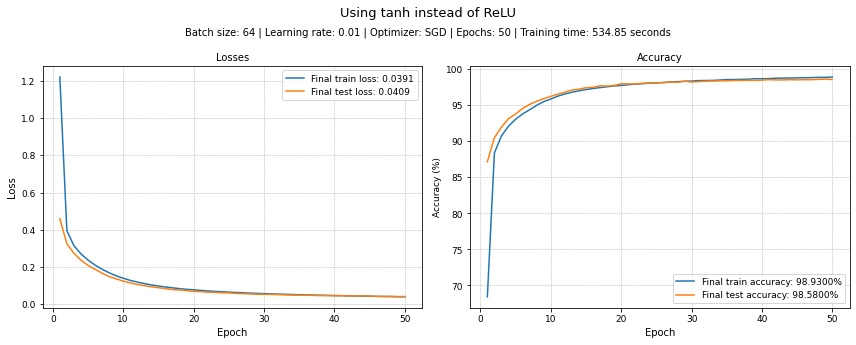

In [30]:
subtitle = f"Batch size: 64 | Learning rate: 0.01 | Optimizer: SGD | Epochs: 50 | Training time: {end - start:.2f} seconds"
training_curve_plot("Using tanh instead of ReLU", subtitle, third_cnn_train_losses, third_cnn_test_losses, third_cnn_train_accuracies, third_cnn_test_accuracies)

##### Using Adam

In [31]:
fourth_cnn_model = ConvNet(CNN1).to(device)


In [32]:
start = time.time()
fourth_cnn_train_losses, fourth_cnn_train_accuracies,fourth_cnn_test_losses, fourth_cnn_test_accuracies = train_model(fourth_cnn_model, train_loader,test_loader, 50 ,0.01,device, isCNN = True, optimizer_type = 'Adam', use_scheduler = False)
end = time.time()

For Epoch [1/50], the Loss is: 0.2004
For Epoch [1/50], the Loss is: 0.1242
For Epoch [1/50], the Loss is: 0.0659
For Epoch [1/50], the Loss is: 0.1224
For Epoch [1/50], the Loss is: 0.1488
For Epoch [1/50], the Loss is: 0.0459
For Epoch [1/50], the Loss is: 0.0287
For Epoch [1/50], the Loss is: 0.0384
For Epoch [1/50], the Loss is: 0.0075
The accuracy of this network on the test set is: 97.75 %
For Epoch [2/50], the Loss is: 0.0547
For Epoch [2/50], the Loss is: 0.0200
For Epoch [2/50], the Loss is: 0.1193
For Epoch [2/50], the Loss is: 0.1645
For Epoch [2/50], the Loss is: 0.1600
For Epoch [2/50], the Loss is: 0.1209
For Epoch [2/50], the Loss is: 0.0301
For Epoch [2/50], the Loss is: 0.1054
For Epoch [2/50], the Loss is: 0.0463
The accuracy of this network on the test set is: 97.97 %
For Epoch [3/50], the Loss is: 0.0424
For Epoch [3/50], the Loss is: 0.1349
For Epoch [3/50], the Loss is: 0.0064
For Epoch [3/50], the Loss is: 0.0974
For Epoch [3/50], the Loss is: 0.1231
For Epoch [3

In [33]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 737.4434239864349


In [34]:
test_model(fourth_cnn_model, test_loader, device, isCNN = True, isBestModel=False)

The accuracy of this network on the test set is: 97.74000000000001 %


(0.11554126810396426, 97.74000000000001)

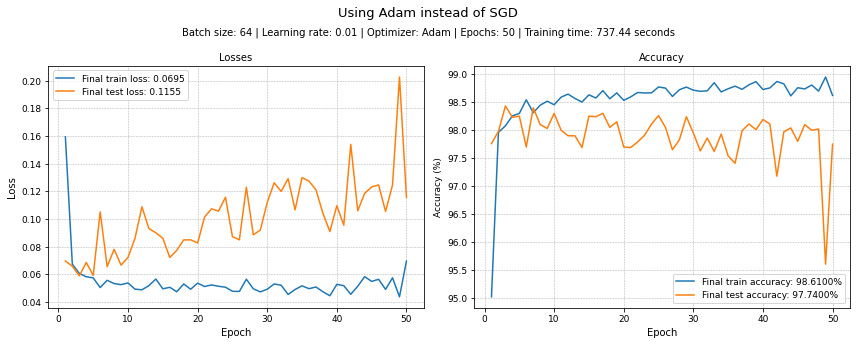

In [35]:
subtitle = f"Batch size: 64 | Learning rate: 0.01 | Optimizer: Adam | Epochs: 50 | Training time: {end - start:.2f} seconds"
training_curve_plot("Using Adam instead of SGD", subtitle, fourth_cnn_train_losses, fourth_cnn_test_losses, fourth_cnn_train_accuracies, fourth_cnn_test_accuracies)

##### Variation 1
Using dropout with relu, with Adam optimizer and learning rate 0.001

In [36]:
fifth_cnn_model = ConvNet(CNN_dropout).to(device)

In [37]:
start = time.time()
fifth_cnn_train_losses, fifth_cnn_train_accuracies,fifth_cnn_test_losses, fifth_cnn_test_accuracies = train_model(fifth_cnn_model, train_loader,test_loader, 30 , 0.001, device, isCNN = True, optimizer_type = 'Adam',use_scheduler= False)
end = time.time()

For Epoch [1/30], the Loss is: 0.3333
For Epoch [1/30], the Loss is: 0.1654
For Epoch [1/30], the Loss is: 0.1332
For Epoch [1/30], the Loss is: 0.1858
For Epoch [1/30], the Loss is: 0.0939
For Epoch [1/30], the Loss is: 0.0782
For Epoch [1/30], the Loss is: 0.0599
For Epoch [1/30], the Loss is: 0.2245
For Epoch [1/30], the Loss is: 0.1206
The accuracy of this network on the test set is: 97.64 %
For Epoch [2/30], the Loss is: 0.0583
For Epoch [2/30], the Loss is: 0.2054
For Epoch [2/30], the Loss is: 0.0544
For Epoch [2/30], the Loss is: 0.0316
For Epoch [2/30], the Loss is: 0.0166
For Epoch [2/30], the Loss is: 0.0298
For Epoch [2/30], the Loss is: 0.0795
For Epoch [2/30], the Loss is: 0.0221
For Epoch [2/30], the Loss is: 0.1057
The accuracy of this network on the test set is: 98.22 %
For Epoch [3/30], the Loss is: 0.0109
For Epoch [3/30], the Loss is: 0.0426
For Epoch [3/30], the Loss is: 0.0045
For Epoch [3/30], the Loss is: 0.0759
For Epoch [3/30], the Loss is: 0.0578
For Epoch [3

In [38]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 610.9024369716644


In [39]:
test_model(fifth_cnn_model, test_loader, device, isCNN =True, isBestModel=False)

The accuracy of this network on the test set is: 99.05000000000001 %


(0.04032672768829154, 99.05000000000001)

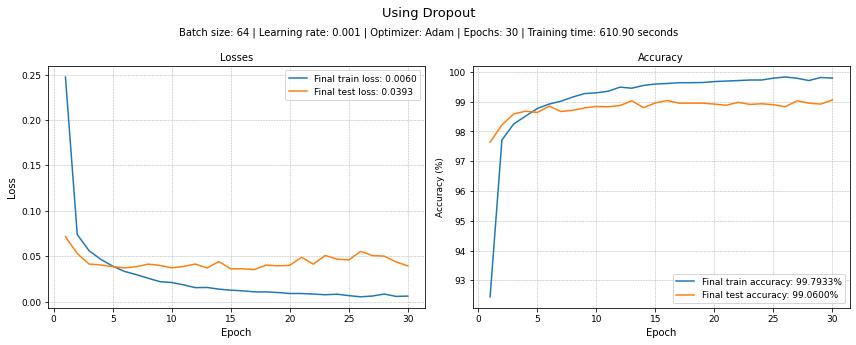

In [40]:
subtitle = f"Batch size: 64 | Learning rate: 0.001 | Optimizer: Adam | Epochs: 30 | Training time: {end - start:.2f} seconds"
training_curve_plot("Using Dropout", subtitle, fifth_cnn_train_losses, fifth_cnn_test_losses, fifth_cnn_train_accuracies, fifth_cnn_test_accuracies)

##### Variation 2
ADAM with learning rate decay (scheduler)
learning rate 0.001


In [41]:
sixth_cnn_model = ConvNet(CNN1).to(device)

In [42]:
start = time.time()
sixth_cnn_train_losses, sixth_cnn_train_accuracies,sixth_cnn_test_losses, sixth_cnn_test_accuracies = train_model(sixth_cnn_model, train_loader,test_loader, 50 ,0.001, device, isCNN=True, optimizer_type='Adam', use_scheduler=True)
end = time.time()

For Epoch [1/50], the Loss is: 0.6090
For Epoch [1/50], the Loss is: 0.1612
For Epoch [1/50], the Loss is: 0.1800
For Epoch [1/50], the Loss is: 0.2124
For Epoch [1/50], the Loss is: 0.1182
For Epoch [1/50], the Loss is: 0.0550
For Epoch [1/50], the Loss is: 0.0778
For Epoch [1/50], the Loss is: 0.1341
For Epoch [1/50], the Loss is: 0.0820
The accuracy of this network on the test set is: 97.35000000000001 %
For Epoch [2/50], the Loss is: 0.1126
For Epoch [2/50], the Loss is: 0.0651
For Epoch [2/50], the Loss is: 0.0591
For Epoch [2/50], the Loss is: 0.0581
For Epoch [2/50], the Loss is: 0.0732
For Epoch [2/50], the Loss is: 0.1289
For Epoch [2/50], the Loss is: 0.0696
For Epoch [2/50], the Loss is: 0.0379
For Epoch [2/50], the Loss is: 0.0127
The accuracy of this network on the test set is: 98.35000000000001 %
For Epoch [3/50], the Loss is: 0.0660
For Epoch [3/50], the Loss is: 0.0602
For Epoch [3/50], the Loss is: 0.0121
For Epoch [3/50], the Loss is: 0.0109
For Epoch [3/50], the Loss

In [43]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 917.2636642456055


In [44]:
test_model(sixth_cnn_model, test_loader, device, isCNN=True, isBestModel=False)

The accuracy of this network on the test set is: 99.14 %


(0.038407547506255704, 99.14)

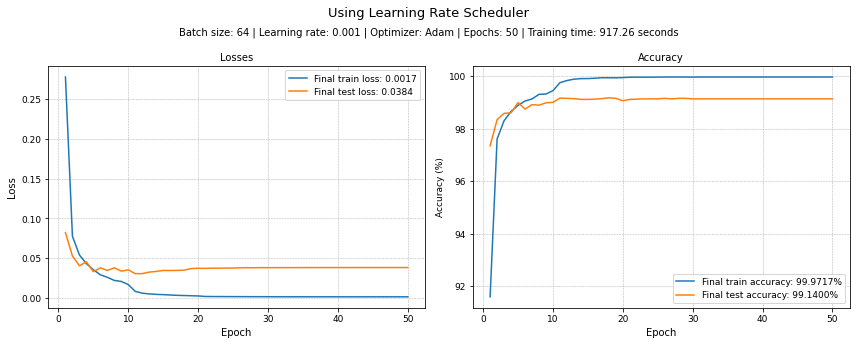

In [45]:
subtitle = f"Batch size: 64 | Learning rate: 0.001 | Optimizer: Adam | Epochs: 50 | Training time: {end - start:.2f} seconds"
training_curve_plot("Using Learning Rate Scheduler", subtitle, sixth_cnn_train_losses, sixth_cnn_test_losses, sixth_cnn_train_accuracies, sixth_cnn_test_accuracies)

##### Variation 3
Adam with learning rate 0.001 using elu with adam scheduler

In [46]:
seventh_cnn_model = ConvNet(CNN_elu).to(device)

In [47]:
start = time.time()
seventh_cnn_train_losses, seventh_cnn_train_accuracies,seventh_cnn_test_losses, seventh_cnn_test_accuracies = train_model(seventh_cnn_model, train_loader,test_loader, 50 ,0.001, device, isCNN=True, optimizer_type='Adam', use_scheduler=True)
end = time.time()

For Epoch [1/50], the Loss is: 0.4863
For Epoch [1/50], the Loss is: 0.1504
For Epoch [1/50], the Loss is: 0.1821
For Epoch [1/50], the Loss is: 0.4312
For Epoch [1/50], the Loss is: 0.0461
For Epoch [1/50], the Loss is: 0.0525
For Epoch [1/50], the Loss is: 0.1011
For Epoch [1/50], the Loss is: 0.0786
For Epoch [1/50], the Loss is: 0.0577
The accuracy of this network on the test set is: 97.46000000000001 %
For Epoch [2/50], the Loss is: 0.0812
For Epoch [2/50], the Loss is: 0.0508
For Epoch [2/50], the Loss is: 0.1032
For Epoch [2/50], the Loss is: 0.0095
For Epoch [2/50], the Loss is: 0.0506
For Epoch [2/50], the Loss is: 0.0522
For Epoch [2/50], the Loss is: 0.1108
For Epoch [2/50], the Loss is: 0.0884
For Epoch [2/50], the Loss is: 0.2041
The accuracy of this network on the test set is: 98.31 %
For Epoch [3/50], the Loss is: 0.1803
For Epoch [3/50], the Loss is: 0.0897
For Epoch [3/50], the Loss is: 0.0260
For Epoch [3/50], the Loss is: 0.0094
For Epoch [3/50], the Loss is: 0.0112


In [48]:
print(f"The training time for this model was: {end - start}")

The training time for this model was: 816.5299656391144


In [49]:
true_labels_all, predicted_labels_all, misclassified_samples = test_model(seventh_cnn_model, test_loader, device, isCNN = True, isBestModel = True)

The accuracy of this network on the test set is: 99.14 %


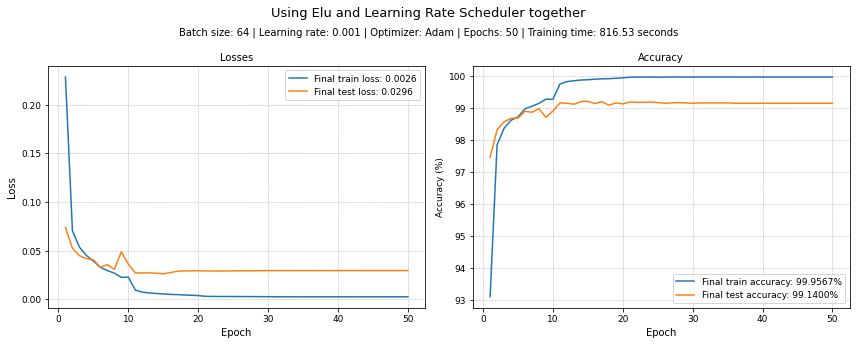

In [50]:
subtitle = f"Batch size: 64 | Learning rate: 0.001 | Optimizer: Adam | Epochs: 50 | Training time: {end - start:.2f} seconds"
training_curve_plot("Using Elu and Learning Rate Scheduler together", subtitle, seventh_cnn_train_losses, seventh_cnn_test_losses, seventh_cnn_train_accuracies, seventh_cnn_test_accuracies)

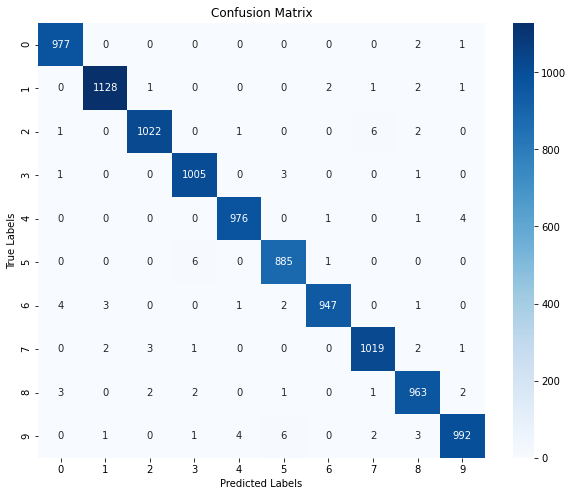

In [51]:
# show confusion matrix for the best model
show_confusion_matrix(true_labels_all, predicted_labels_all)

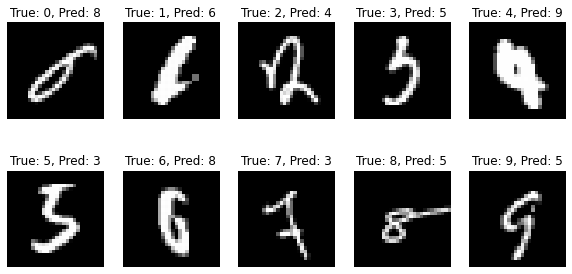

In [52]:
# show 10 misclassified samples for the best model
show_misclassified_samples(misclassified_samples)